In [111]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

# Abstract

In this study, we are interested in developing classification methods for predicting patients 
with Diabetes Type II based on two different sets of health records.  Several common binary classification 
methods are compared for this task -  
 - K-Nearest Neighbors, 
 - Decision trees, 
 - SVM, 
 - Boosting, 
 - Neural Nets. 

# Introduction

Type 2 Diabetes Mellitus is a metabolic disorder that is defined by high blood glucose levels due to insulin resistance or an impaired ability to produce insulin,viz. the harmone that helps cells absorb and metabolize glucose from blood stream.

As of 2014, as per CDC records, over 22 million people in the United States have diabetes. If current trends continue, the CDC estimates 1 in 3 U.S. adults could have diabetes by 2050. Type 2 diabetes is responsible for 90% of all diabetes cases. Hereafter, we will abbreviate type 2 diabetes as diabetes. 

Diabetes increases the retinopathy, kidney failure, heart disease and stroke and peripheral vascular disease. It is especially prevalent in racial groups with low access to healthcare, such as Native Americans (15.9%), African Americans (13.2%) and Hispanics (12.8%). An estimated 27.8% of people with Diabetes Mellitus Type II in the United States are undiagnosed. A primary reason for this underdiagnosis is the steep cost assosciated with the clinical procedures. For instance, despite the dangers of leaving diabetes untreated, the WHO does not recommend universal screening because of the expense. Current clinical procedures have focused on evidence-based screening, where patients exhibiting risk factors for diabetes such as hypertension and obesity are screened. This approach while also employing expensive human resources, has the distinct disadvantage of being low-throughput and error-prone. As a result, many patients are often detected late in the progression of the disease, when preventive measures are significantly less effective. 

With burgeoning health care costs both to the individuals and to health care providers, there is an urgent need to develop efficient ways to detect diabetes and diabetes vulnerability before the actual onset of the condition. This allows providers to screen patients and advise remedial courses of action. Over the recent years there has been an shift towards structred, electronic storage of patient history in medical facilities. ***The premise of this study is to employ supervised learning classifiers on these "Eletronic Health Records" to develop predictive models for early diagnosis of diabetes.***

An electronic health record (EHR), refers to the systematized collection of patient and population electronically-stored health information in a digital format. These records can be shared across different health care settings. Records are shared through network-connected, enterprise-wide information systems or other information networks and exchanges. EHRs may include a range of data, including demographics, medical history, medication and allergies, immunization status, laboratory test results, radiology images, vital signs, personal statistics like age and weight, and billing information.[wiki](https://en.wikipedia.org/wiki/Electronic_health_record)

A possibile use for the availability of this structured data in the form of EHR is to predict prevalent diseases such as diabetes. Diabetes in particular, is present in 8.5% of the population in the US and being able to predict diabetes diagnosis from past hospital visits is a step forward towards early detection of diabetes type II as well as understanding its relations with other diagnosis and risk factors. 


# Datasets

This study shall use two different de-identified data sets of patient history  - one provided by *EHR vendor Practice Fusion in their kaggle challenge* and another provided by the *National Institute of Diabetes and Digestive and Kidney Diseases*.

The first dataset has been obtained as a small constrained, controlled set from a much larger dataset. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The dataset can be obtained from Kaggle and this [link](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. *The objective is to predict based on diagnostic measurements whether a patient has diabetes*.

## Dataset information

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Relevant papers

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). [Using the ADAP learning algorithm to forecast the onset of diabetes mellitus](http://rexa.info/paper/04587c10a7c92baa01948f71f2513d5928fe8e81). *In Proceedings of the Symposium on Computer Applications and Medical Care* (pp. 261--265). IEEE Computer Society Press.

## Data Attributes:

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1)

[link to example](https://www.kaggle.com/hugues/d/uciml/pima-indians-diabetes-database/basic-ml-best-of-10-classifiers/notebook)

[link to dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for table-like data and matrices
import numpy as np
import pandas as pd

#Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

#Configure Visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

#modules for learning and post-processing
import os
import subprocess
import pydotplus as pydot

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from IPython.display import Image
from IPython.display import Image
from sklearn.externals.six import StringIO
import sklearn.tree as tree
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import itertools
from sklearn.metrics import confusion_matrix
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

/home/grdstu/programs/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/grdstu/programs/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


All Supporting Functions are listet here

In [3]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "tree.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
        
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [4]:
indata = pd.read_csv("./input/diabetes.csv")
indata.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
describe_more(indata)

Datatype  Levels                  Variable
8    int64       2                   Outcome
0    int64      17               Pregnancies
2    int64      47             BloodPressure
3    int64      51             SkinThickness
7    int64      52                       Age
1    int64     136                   Glucose
4    int64     186                   Insulin
5  float64     248                       BMI
6  float64     517  DiabetesPedigreeFunction

In [6]:
print('# of rows', len(indata))
print('# of columns', len(indata.columns))
indata.describe()

# of rows 768
# of columns 9


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Checking for missing data

In [7]:
print('# of missing data', indata.isnull().any().sum())

# of missing data 0


Pre-Processing and Analysis of the data

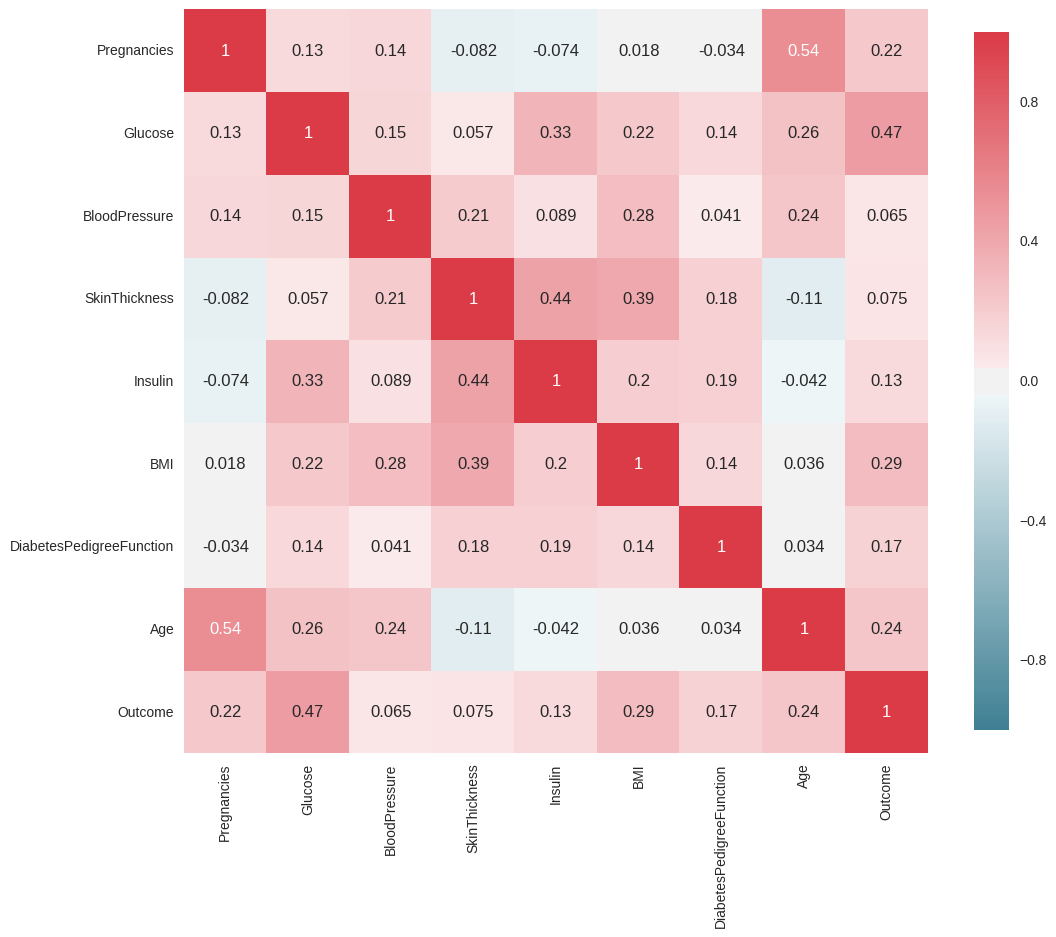

In [8]:
plot_correlation_map(indata)

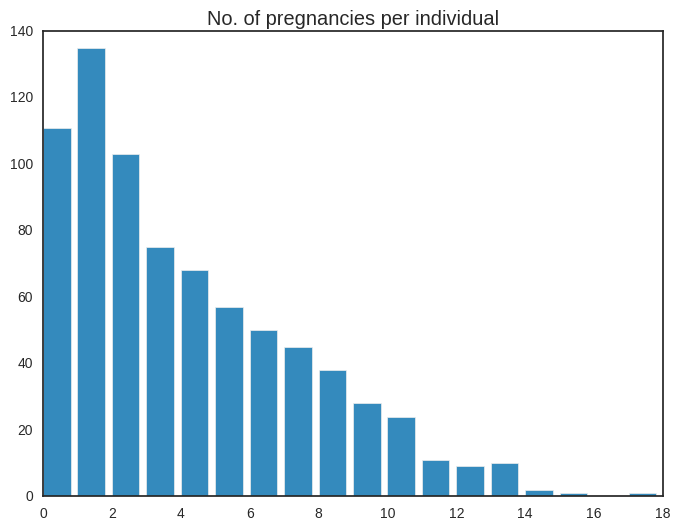

In [8]:
preg_count = indata.groupby('Pregnancies').Pregnancies.count()

values = preg_count.values
indx   = preg_count.index
# print(indx)
# print(values)
# print(sum(values))

mean = sum(values)/len(indx)
variance = np.sqrt(sum((values-mean)**2)/len(indx))

plt.bar(indx, values)
plt.title('No. of pregnancies per individual')
plt.xticks(rotation='horizontal')
plt.show()

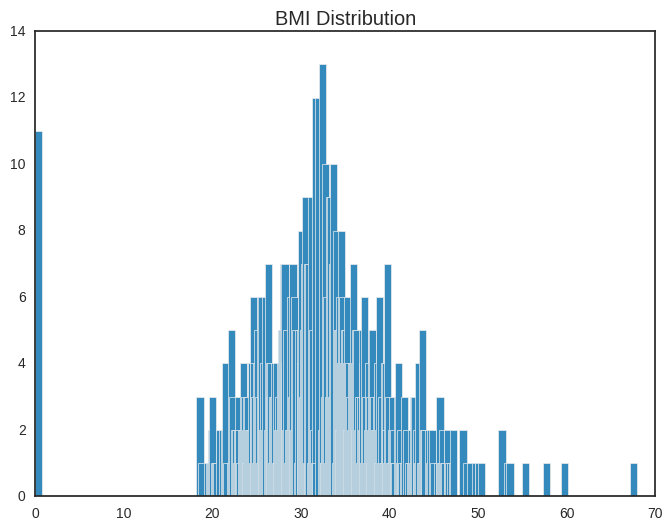

In [9]:
preg_count = indata.groupby('BMI').BMI.count()

values = preg_count.values
indx   = preg_count.index
# print(indx)
# print(values)
# print(sum(values))

mean = sum(values)/len(indx)
variance = np.sqrt(sum((values-mean)**2)/len(indx))

plt.bar(indx, values)
plt.title('BMI Distribution')
plt.xticks(rotation='horizontal')
plt.show()

The above plot shows that there are abnormal data points (outliers) in the dataset. As such, the outliers shall need to be identified and eliminated. In the present study we shall use a gaussian distrubution to weed out outliers. 

In [11]:
#To check for outlier points
low = .002
high = .998
qdf = indata.quantile([low, high])
# print(qdf.loc[low,'age'])
qdf

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
0.002        0.000    0.000          0.000          0.000    0.000   0.0000   
0.998       14.466  197.466        111.864         61.398  709.824  58.2786   

       DiabetesPedigreeFunction     Age  Outcome  
0.002                  0.084534  21.000      0.0  
0.998                  2.307106  70.932      1.0

df is a buffer on which the pre-processing operation shall be carried out
The original dataset was reduced by removing outliers, resulting in following dataset with reported dimensions

In [5]:
from scipy import stats
df = indata.copy()
df = indata[(np.abs(stats.zscore(df)) < 3.6).all(axis=1)].copy()
# df = df[df.BMI != 0]
print("dimensons of the reduced dataset")
print("-------------------------------------")
print(df.info())

dimensons of the reduced dataset
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 730 non-null int64
Glucose                     730 non-null int64
BloodPressure               730 non-null int64
SkinThickness               730 non-null int64
Insulin                     730 non-null int64
BMI                         730 non-null float64
DiabetesPedigreeFunction    730 non-null float64
Age                         730 non-null int64
Outcome                     730 non-null int64
dtypes: float64(2), int64(7)
memory usage: 57.0 KB
None


Checking for extremas in the reduced dataset

In [10]:
low = .002
high = .998
qdf = df.quantile([low, high])
qdf

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
0.002          0.0   56.458          0.000          0.000      0.0  18.2000   
0.998         14.0  197.542        112.168         55.084    480.0  54.1756   

       DiabetesPedigreeFunction     Age  Outcome  
0.002                  0.084458  21.000      0.0  
0.998                  1.469130  69.542      1.0

distribution of individuals with respect to age, with and without diabetes

This is expected as incidence of diabetes should be higher among individuals in older age groups.

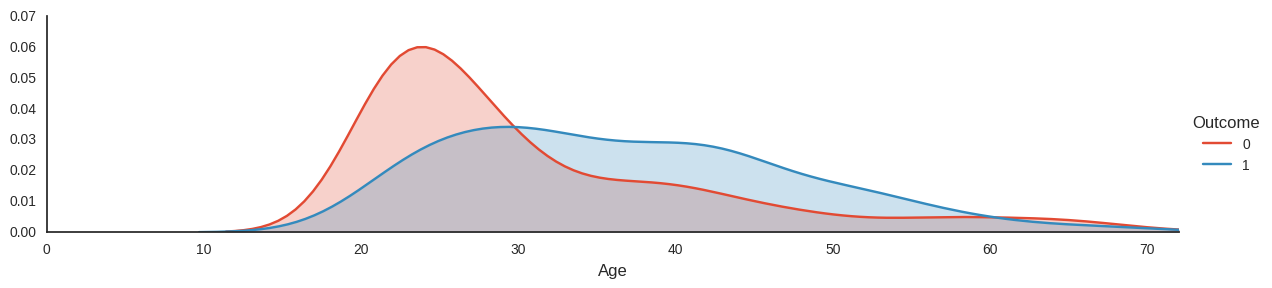

In [42]:
plot_distribution( df , var = 'Age' , target = 'Outcome')

At this point we would also like to look at actual incidences of diabetic vs. Non-diabetic in the dataset

0    481
1    249
Name: Outcome, dtype: int64


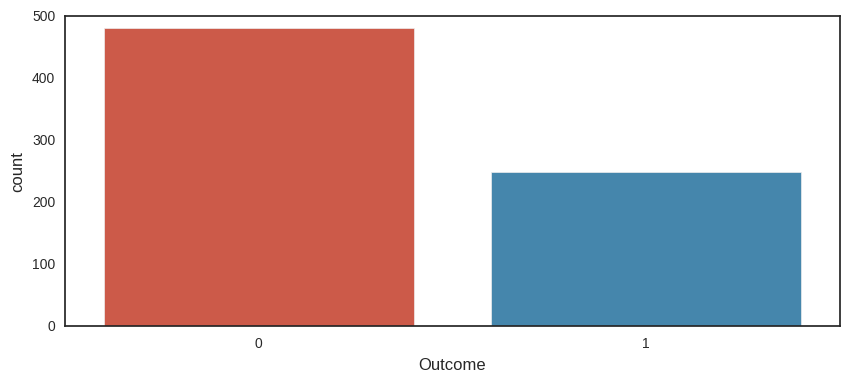

In [61]:
print(df.Outcome.value_counts())
fig, (axis1) = plt.subplots(1,1,figsize=(10,4))
sns.countplot(x=df["Outcome"], order=[0,1], ax=axis1)


As we can see, our data set is slightly imbalanced with **481** instances of the non-diabetic class vis-a-vis **249** occurances of diabetic class.

Hereafter, we shall devided the dataset into predictor [diagnostic features] and response [Outcome] matrices.
Then the dataset will be split into training and test sets. Learning and analysis will be carried out on the test set, with final error metric reported using test dataset 

In [11]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

We have carried out stratified splitting of the dataset into test and training (80-20 ratio) and the following plots demonstrates that the two sets have similar distribution of properties.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.20, random_state=0)

In [13]:
print("for training set \n\n", y_train.value_counts()/len(y_train))
print("")
print("for test set \n\n", y_test.value_counts()/len(y_test))

for training set 

 0    0.659247
1    0.340753
Name: Outcome, dtype: float64

for test set 

 0    0.657534
1    0.342466
Name: Outcome, dtype: float64


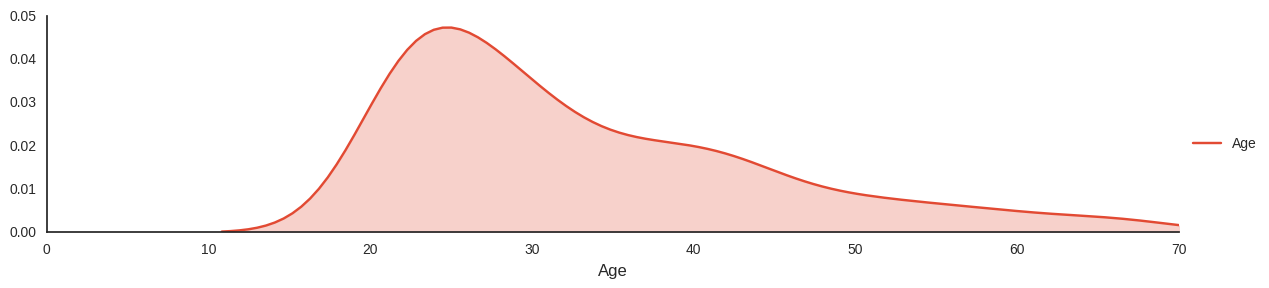

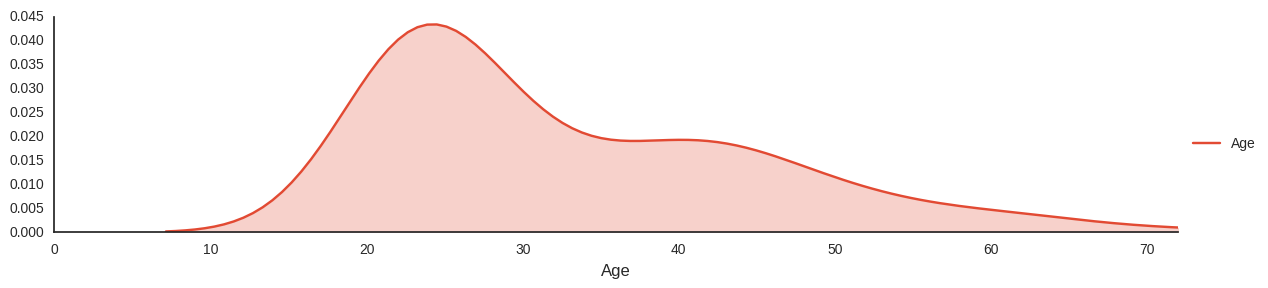

In [14]:
plot_distribution( X_train , var = 'Age' , target = None)
plot_distribution( X_test , var = 'Age' , target = None)

In the analysis we shall be using the following five algorithms - Early on in the analysis we would like to see the performance of default state of each classifier on our dataset.

In [100]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree-Entropy","Decision Tree-Gini", "Neural Net = lbfgs","Neural Net = ADAM", "AdaBoost"]
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(criterion = 'entropy'),
    DecisionTreeClassifier(criterion = 'gini'),
    MLPClassifier(solver='lbfgs'),
    MLPClassifier(solver='adam'),
    AdaBoostClassifier()
]

On iterating over the classifiers, we have:

In [101]:
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores

In [102]:
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

   Nearest Neighbors | Accuracy: 70.03% (+/- 9.01%)
  Neural Net = lbfgs | Accuracy: 66.19% (+/- 7.38%)
            AdaBoost | Accuracy: 74.95% (+/- 4.76%)
   Neural Net = ADAM | Accuracy: 65.63% (+/- 11.86%)
  Decision Tree-Gini | Accuracy: 69.47% (+/- 9.88%)
             RBF SVM | Accuracy: 65.81% (+/- 0.59%)
          Linear SVM | Accuracy: 77.53% (+/- 6.10%)
Decision Tree-Entropy | Accuracy: 68.38% (+/- 5.65%)


As we can see, over all linear SVM has the highest accuracy, followed by Adaboost which uses decision trees. RBF SVM has the least accuracy.

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1),
    AdaBoostClassifier()
]

Henceforth, we shall analyse the performance of individual algorithms

# Decision Trees

Firstly, we shall generate based on two different classification criterion just to demonstrate the difference

A Decision tree based on entropy criterion using default values.

In [15]:
# model = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model  = DecisionTreeClassifier(criterion = 'entropy')
model  = model.fit(X_train, y_train)

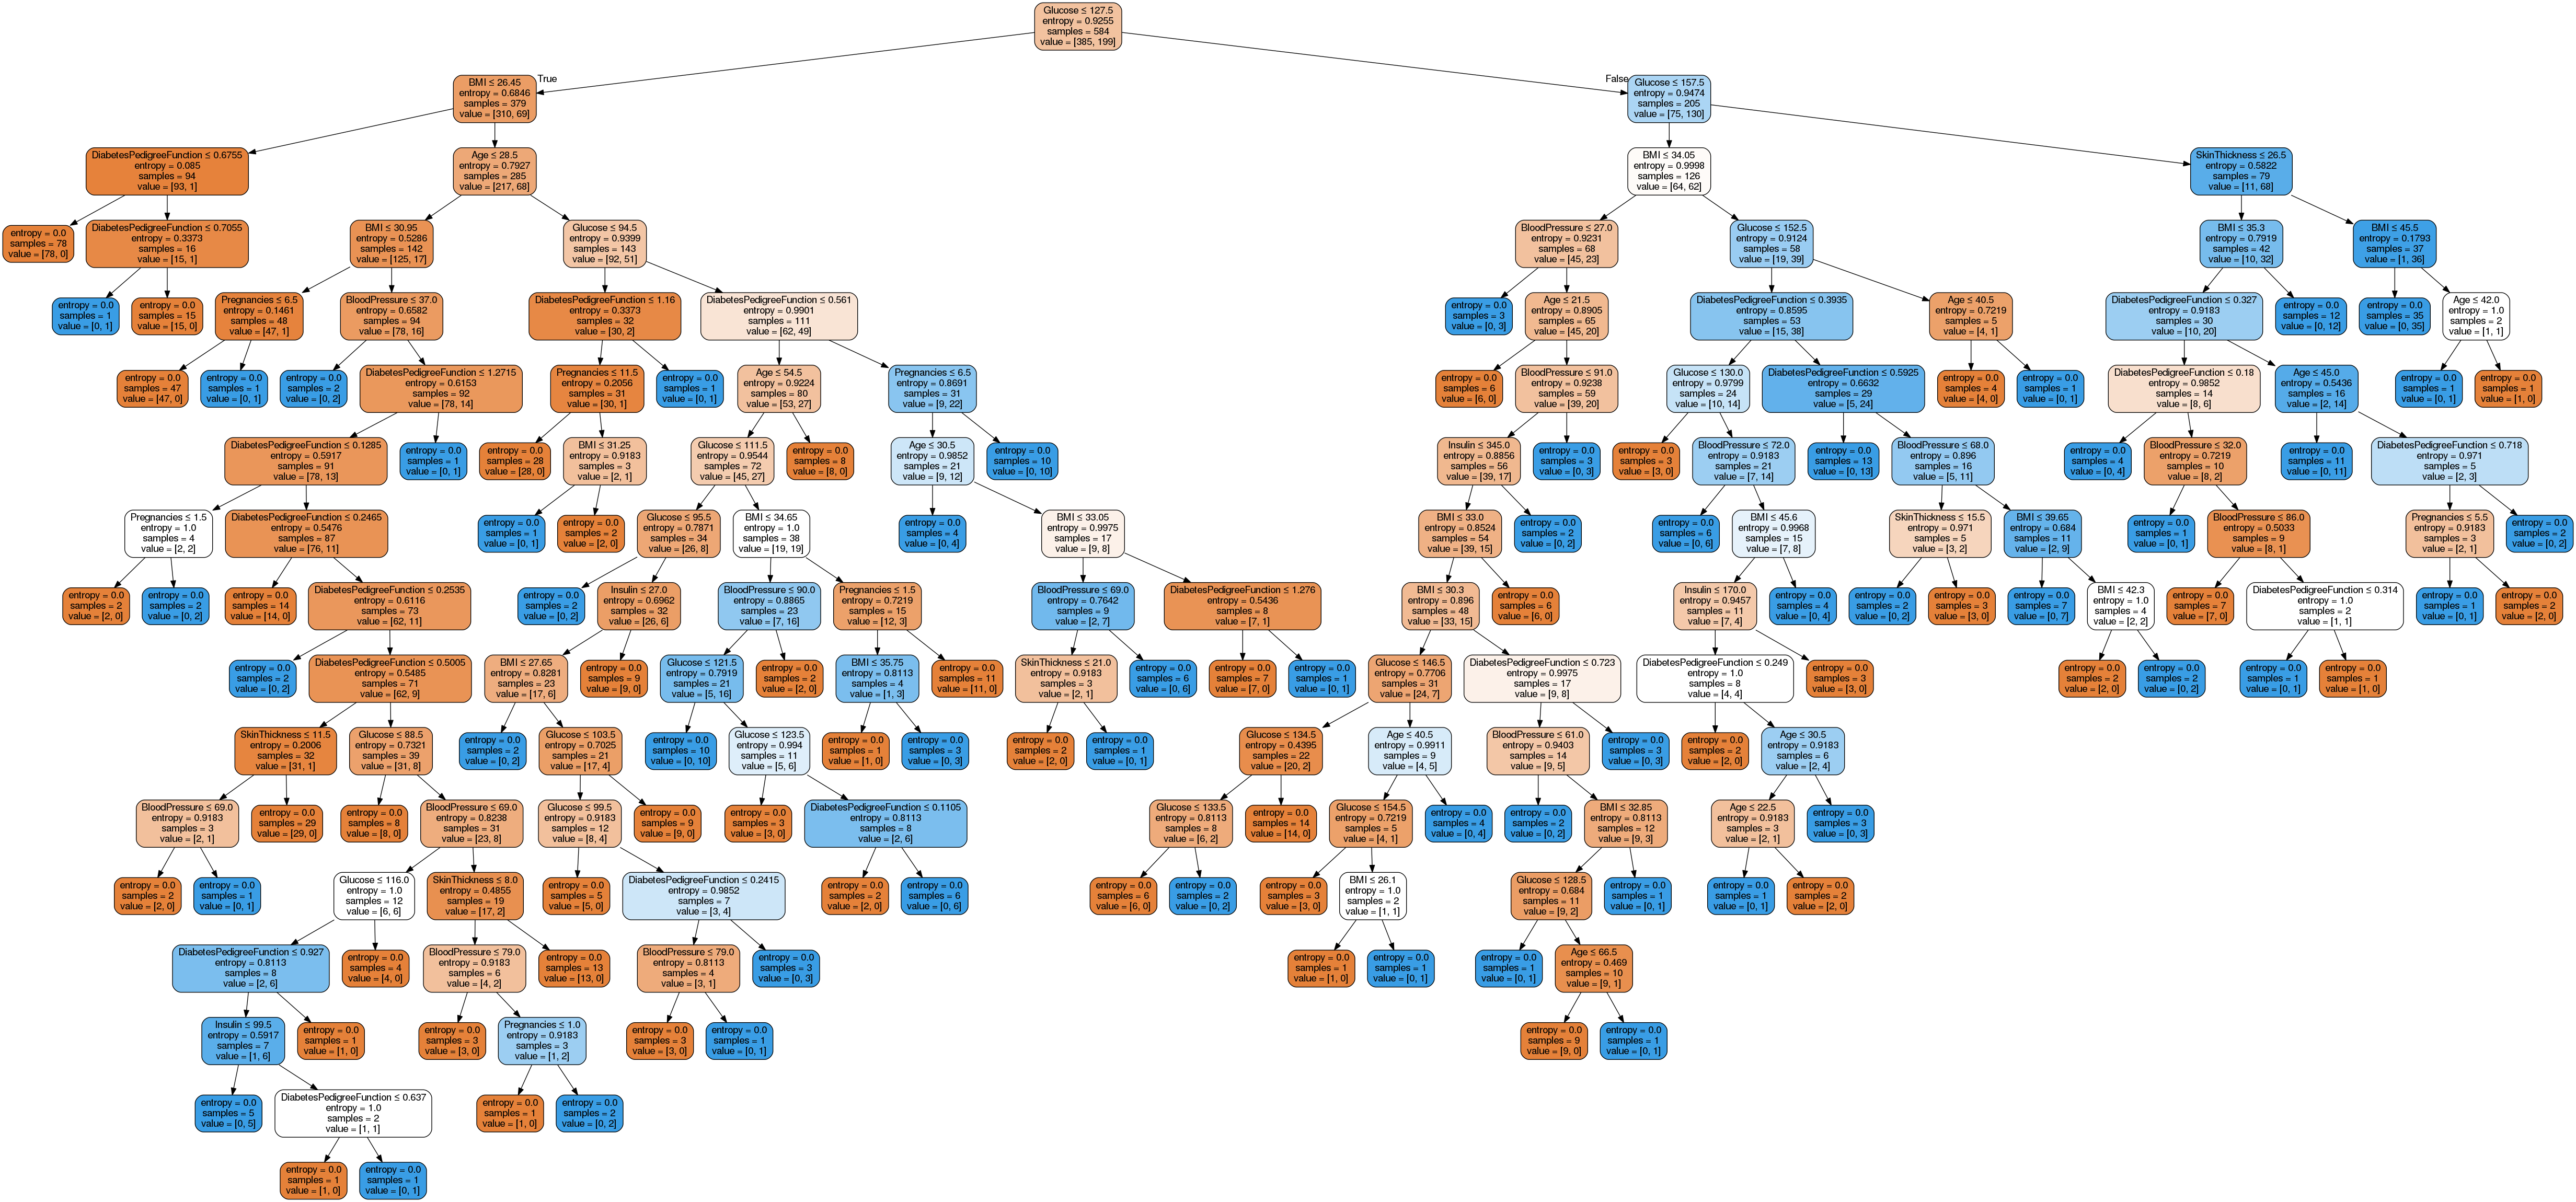

In [16]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=indata.columns,    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

A Decision tree based on gini criterion using default values.

In [18]:
model  = DecisionTreeClassifier(criterion = 'gini')
model  = model.fit(X_train, y_train)

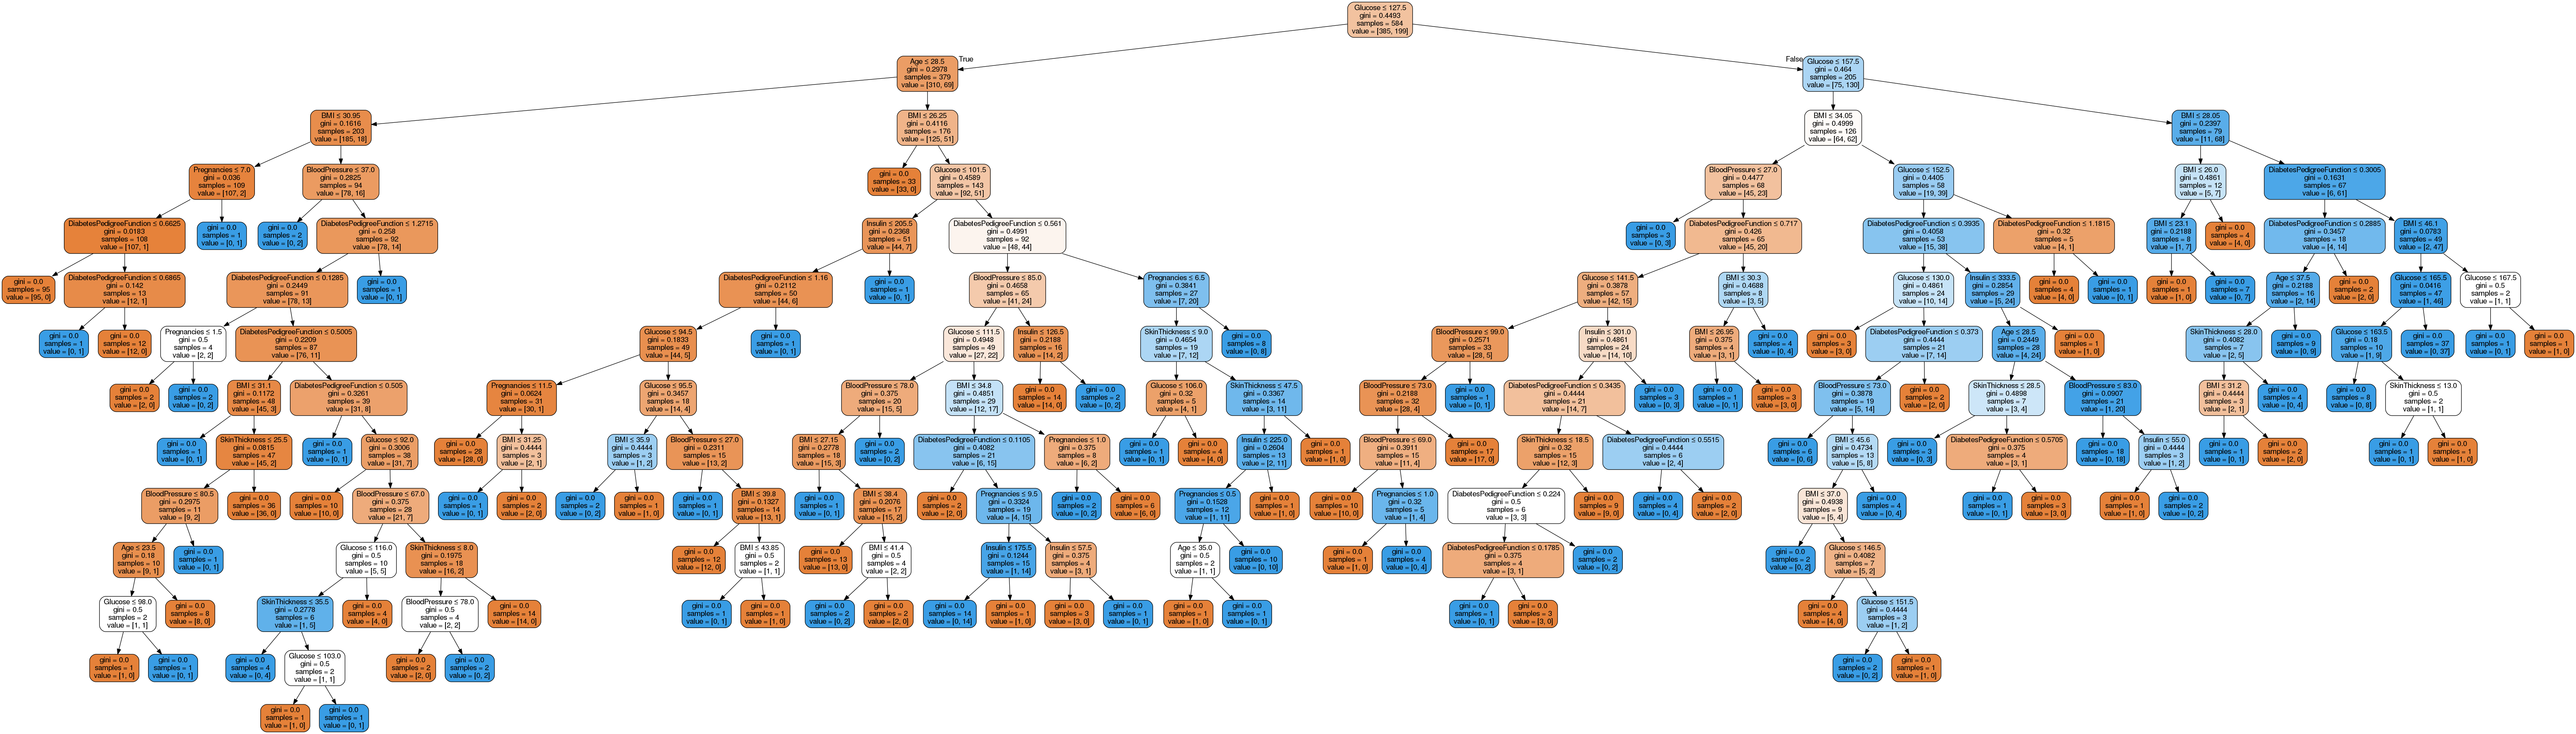

In [19]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=indata.columns,    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Parameter Search on decision trees**


** Criterion => Gini **

In [20]:
clf = DecisionTreeClassifier(criterion = 'gini')

# prepare a range of values to test
md = [1,2,3,4,5,6,7,8,10,12,16,18,20]
param_grid = [
  {'max_depth': md},
 ]
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 18, 20]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


**summarizing the results from a grid search on gini criterion based decision tree**

In [21]:
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.max_depth))

Best score: 75.68%
Best estimator for parameter C: 3.000000


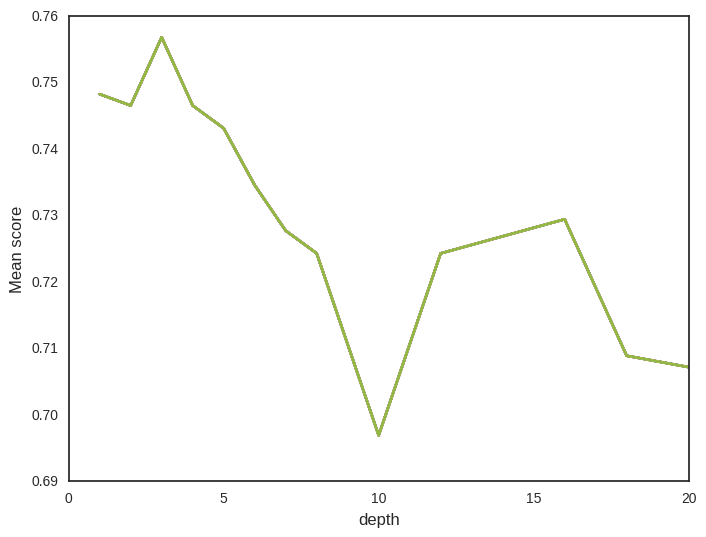

In [22]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores)
md = np.array(md)
for ind, i in enumerate(md):
    plt.plot(md, scores)
plt.legend()
plt.xlabel('depth')
plt.ylabel('Mean score')
plt.show()

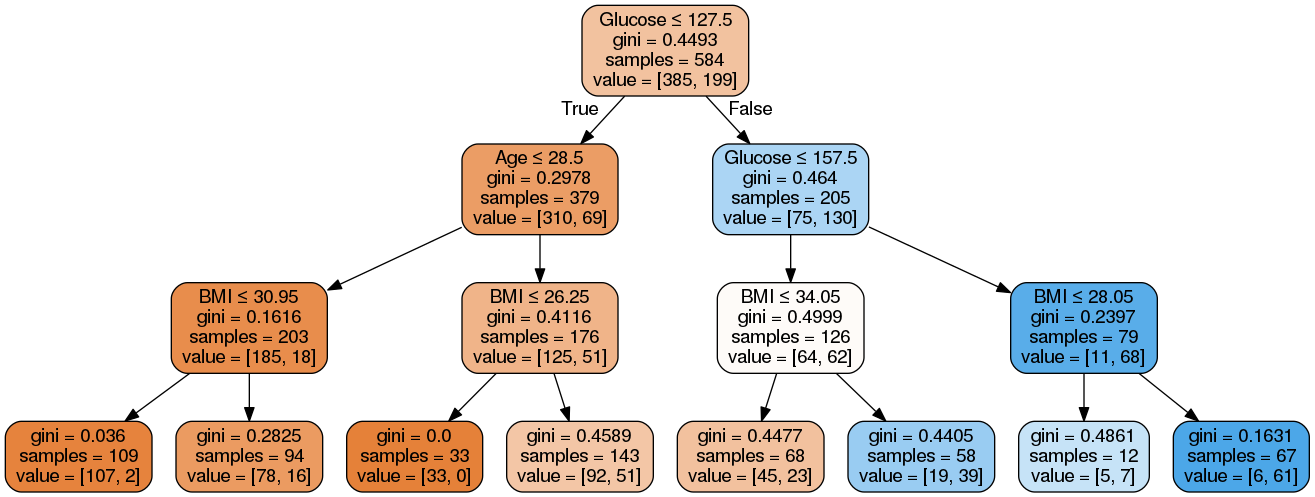

In [24]:
model  = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model  = model.fit(X_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=indata.columns,    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Learning Curve**

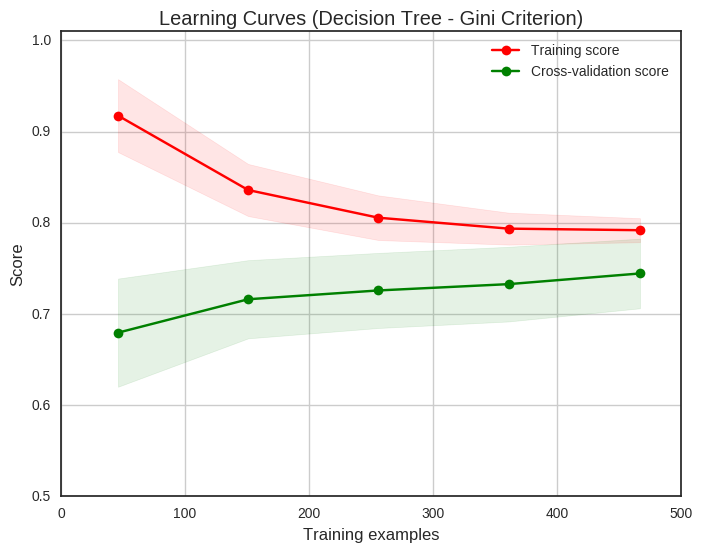

In [35]:
title = "Learning Curves (Decision Tree - Gini Criterion)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

**Confusion Matrix** best on test data

Confusion matrix, without normalization
[[82 14]
 [31 19]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.62  0.38]]


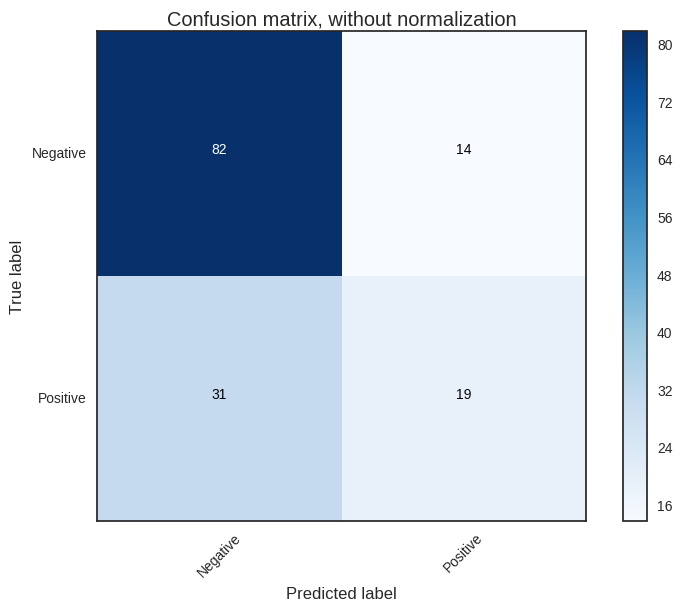

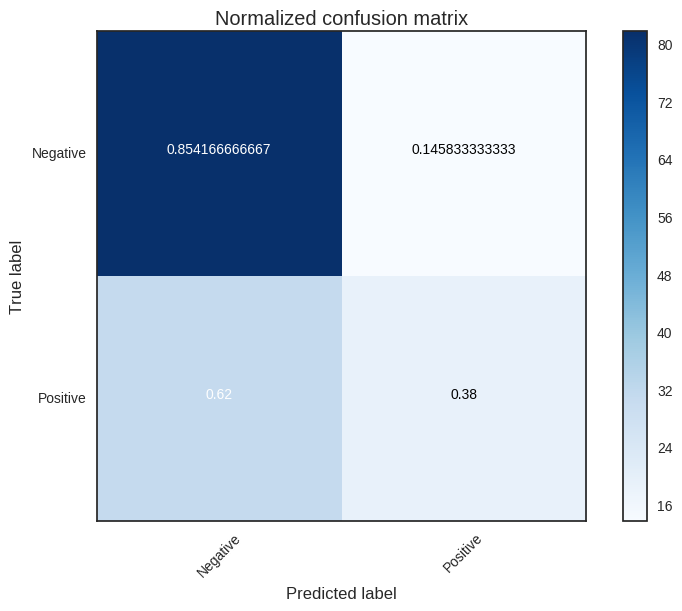

In [28]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


dates = pd.date_range('20160101', periods=2)
class_names = pd.DataFrame({
    'Negative' : 0,
    'Positive' : 1
}, index = dates)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Final Score based on test data

In [29]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 69.18%


** Criterion => Entropy **

In [30]:
clf = DecisionTreeClassifier(criterion = 'entropy')

# prepare a range of values to test
md = [1,2,3,4,5,6,7,8,10,12,16,18,20]
param_grid = [
  {'max_depth': md},
 ]
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 18, 20]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


**summarizing the results from a grid search on gini criterion based decision tree**

In [31]:
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.max_depth))

Best score: 74.49%
Best estimator for parameter C: 3.000000


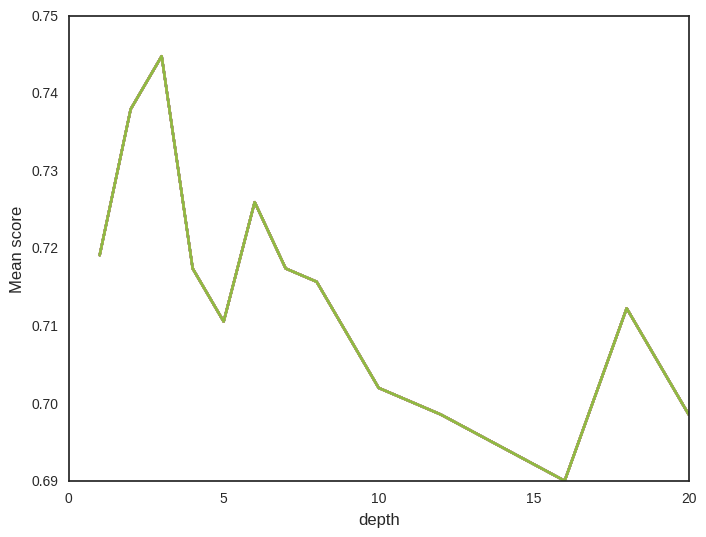

In [32]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores)
md = np.array(md)
for ind, i in enumerate(md):
    plt.plot(md, scores)
plt.legend()
plt.xlabel('depth')
plt.ylabel('Mean score')
plt.show()

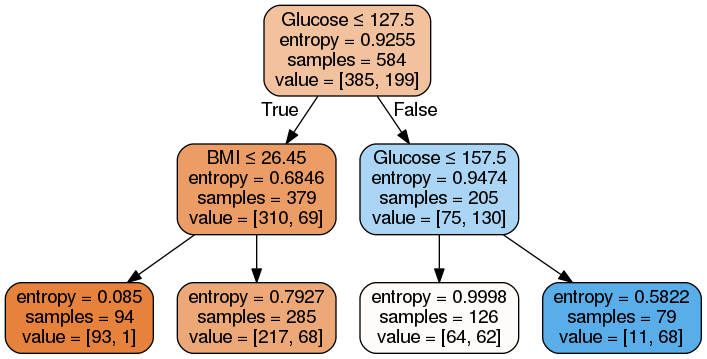

In [33]:
model  = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model  = model.fit(X_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=indata.columns,    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Learning Curve**

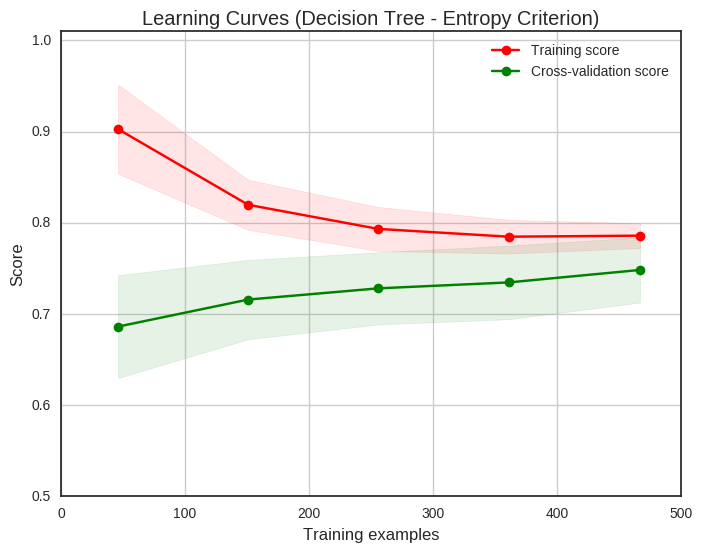

In [36]:
title = "Learning Curves (Decision Tree - Entropy Criterion)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

**Confusion Matrix**

Confusion matrix, without normalization
[[82 14]
 [31 19]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.62  0.38]]


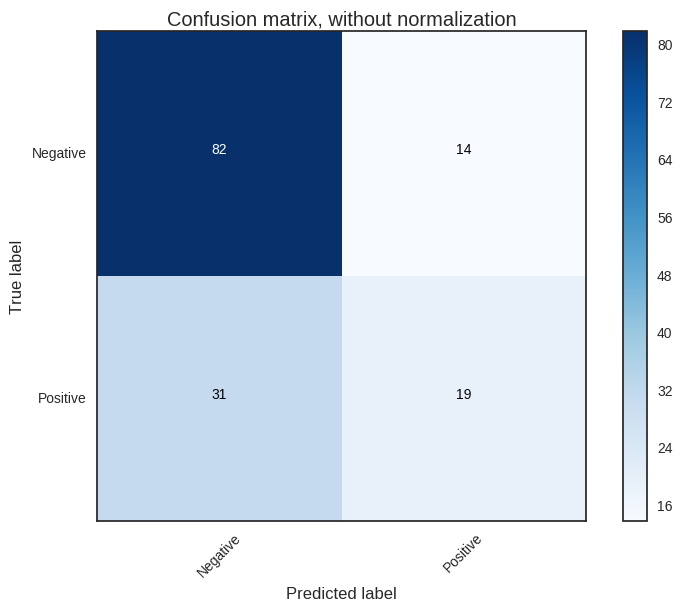

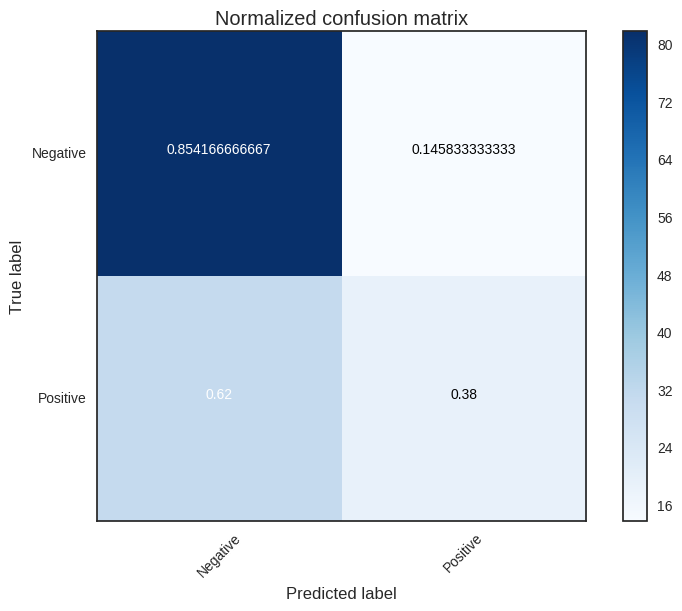

In [42]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# class_names = X_train.columns
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Final Score based on test data

In [41]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 69.18%


# Support Vector Matrices

We shall carry out a parameter search over a range of two parameters C and Gamma

**SVC Linear Kernel**

In [43]:
clf = SVC(kernel="linear")

# prepare a range of values to test
Cs = [0.01, .01, .1, 1, 10]

param_grid = [
  {'C': Cs}
 ]

grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [44]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.C))

Best score: 78.77%
Best estimator for parameter C: 1.000000


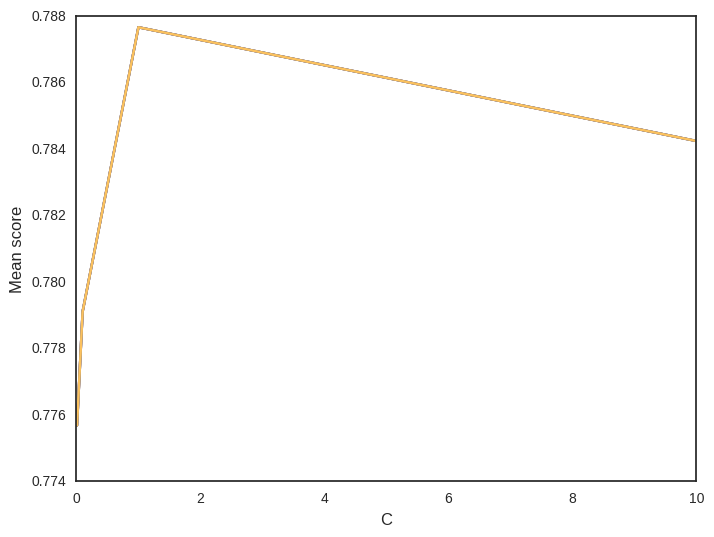

In [48]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores)
Cs = np.array(Cs)
for ind, i in enumerate(Cs):
    plt.plot(Cs, scores)
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()

**Learning Curve**

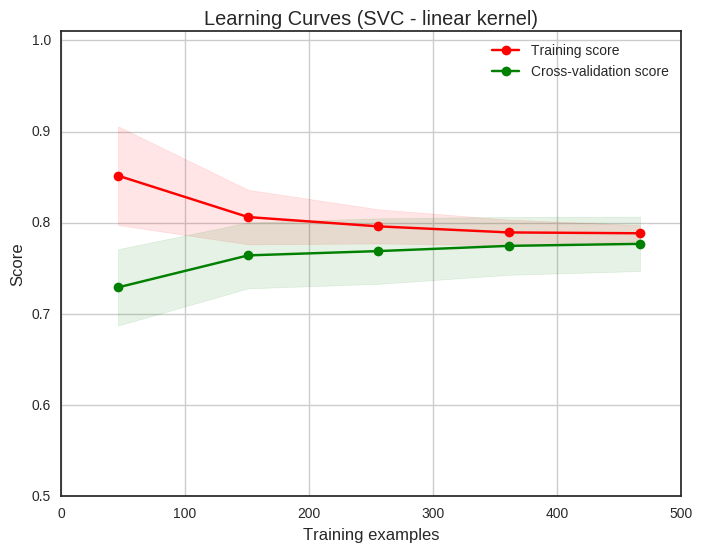

In [51]:
best_parameter = 1
title = "Learning Curves (SVC - linear kernel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC(C=1, kernel="linear")
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

**Confusion Matrix**

Confusion matrix, without normalization
[[86 10]
 [23 27]]
Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.46  0.54]]


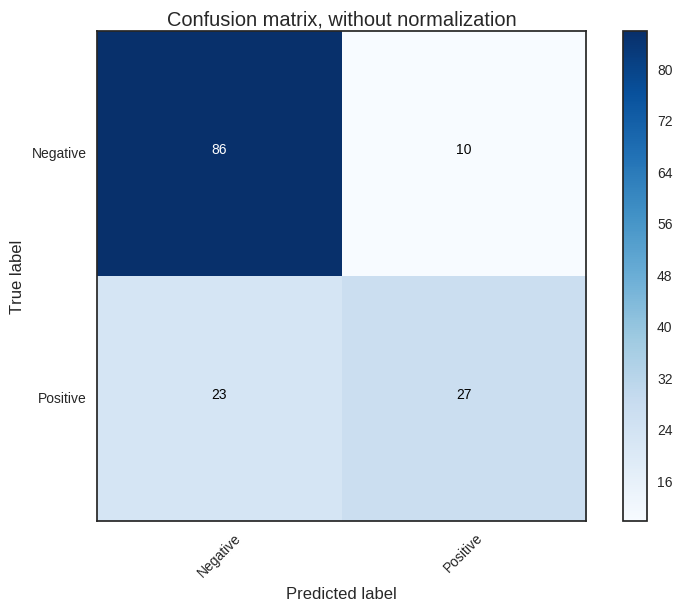

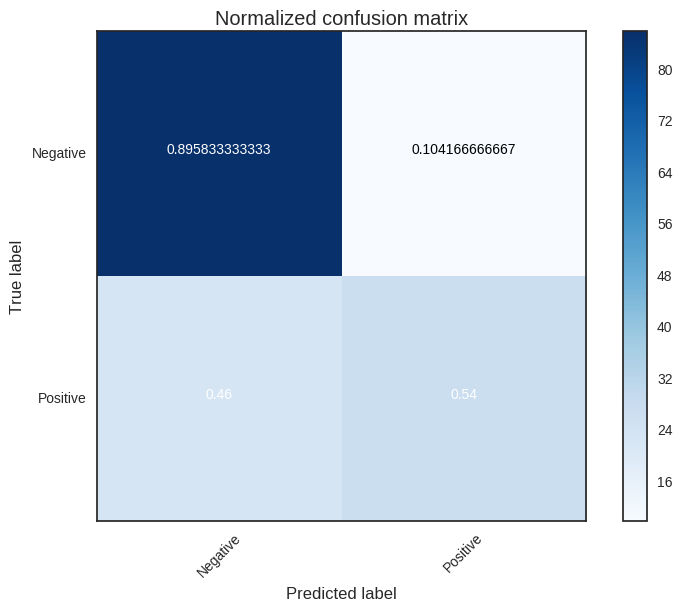

In [53]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = SVC(kernel='linear', C=1.0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# class_names = X_train.columns
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [54]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 77.40%


**SVC  - Kernel - 'rbf'**

In [55]:
clf = SVC(kernel="rbf")
Cs = [0.001, 0.01, .01, .1, 1, 10]
# prepare a range of values to test
param_grid = [
  {'C': Cs},
 ]

grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [56]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.C))

Best score: 65.92%
Best estimator for parameter C: 0.001000


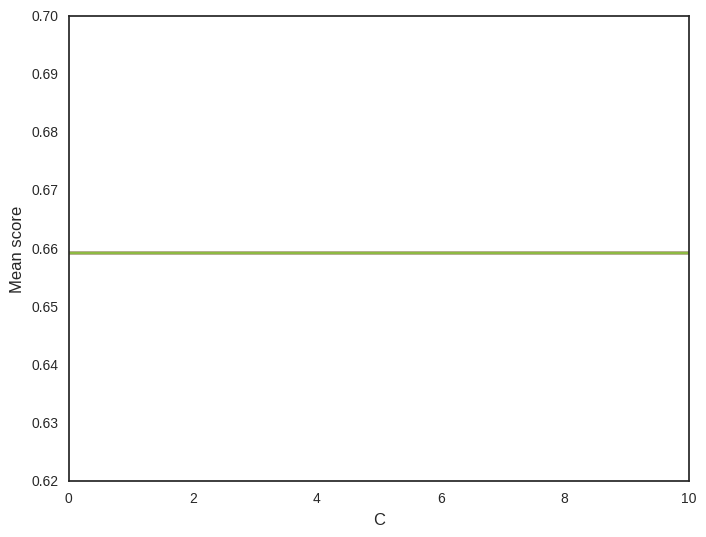

In [57]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores)
Cs = np.array(Cs)
for ind, i in enumerate(Cs):
    plt.plot(Cs, scores)
plt.legend()
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()

**Learning Curve**

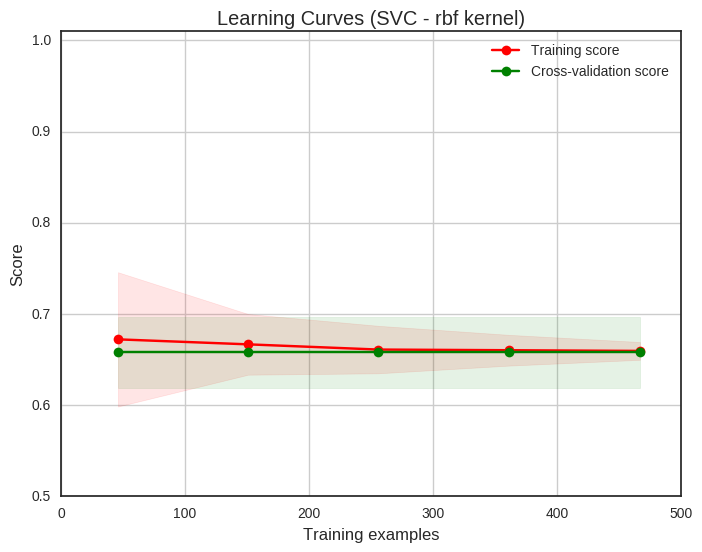

In [60]:
best_parameter = 0.001
title = "Learning Curves (SVC - rbf kernel)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'rbf', C = best_parameter)
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

**Confusion Matrix**

Confusion matrix, without normalization
[[96  0]
 [50  0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


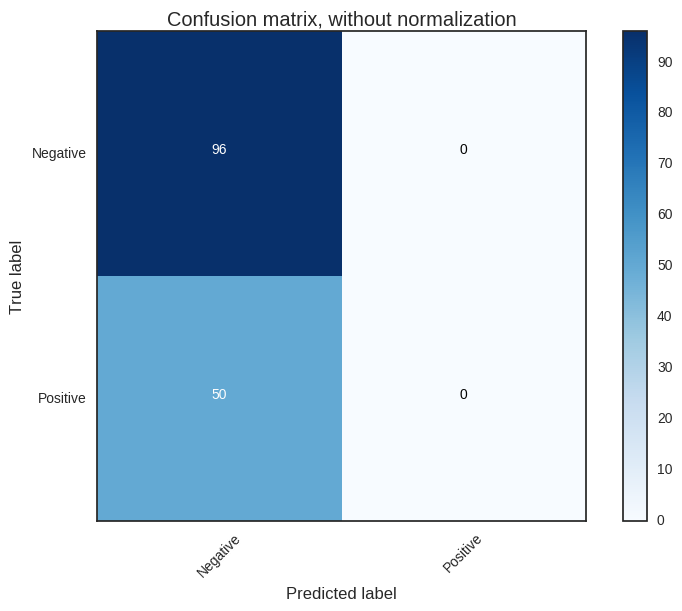

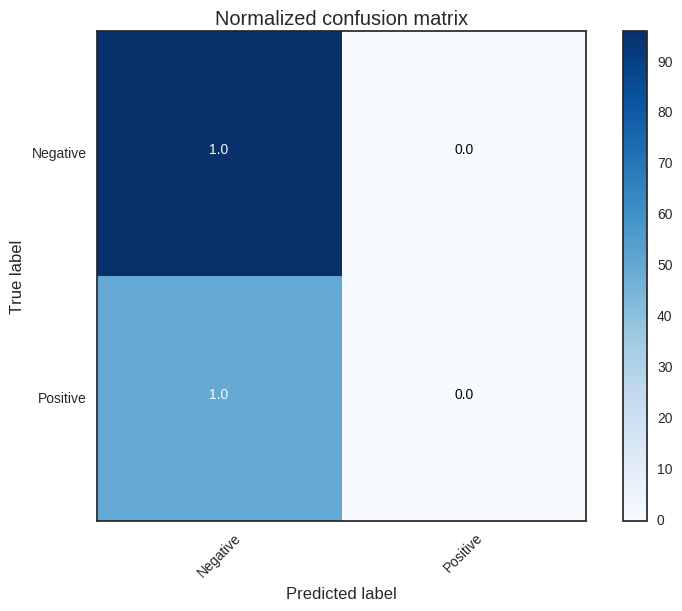

In [61]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = SVC(kernel='rbf', C=0.001)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# class_names = X_train.columns
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
clf = SVC(kernel='rbf', C=0.001)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 65.75%


# Neural Networks

In [70]:
# clf =  MLPClassifier(alpha=1e-5,
#                     solver='lbfgs', verbose=10, tol=1e-4, random_state=1,
#                     learning_rate_init=.1)
clf =  MLPClassifier(solver='lbfgs')

# prepare a range of values to test
param_grid = [
  {'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,)]},
]
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,)]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [71]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter hidden_layer_sizes: %f" % (grid.best_estimator_.hidden_layer_sizes))

Best score: 75.86%
Best estimator for parameter hidden_layer_sizes: 8.000000


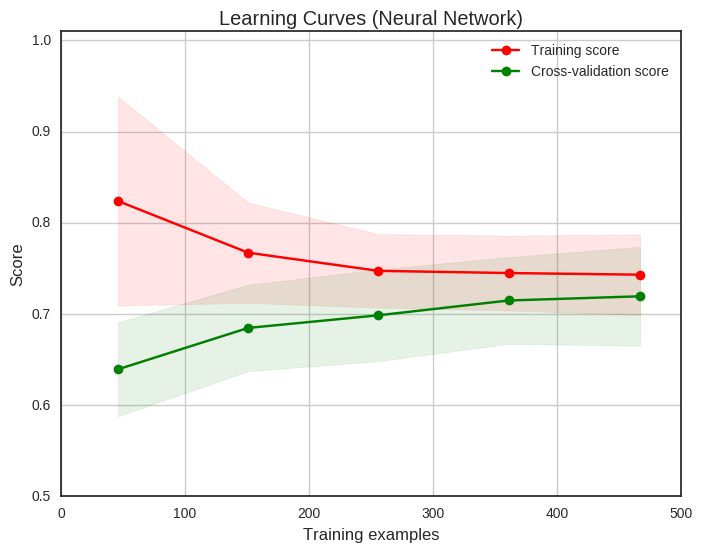

In [65]:
title = "Learning Curves (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = MLPClassifier(hidden_layer_sizes = 10,solver='lbfgs')
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

Confusion matrix, without normalization
[[84 12]
 [28 22]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.56  0.44]]


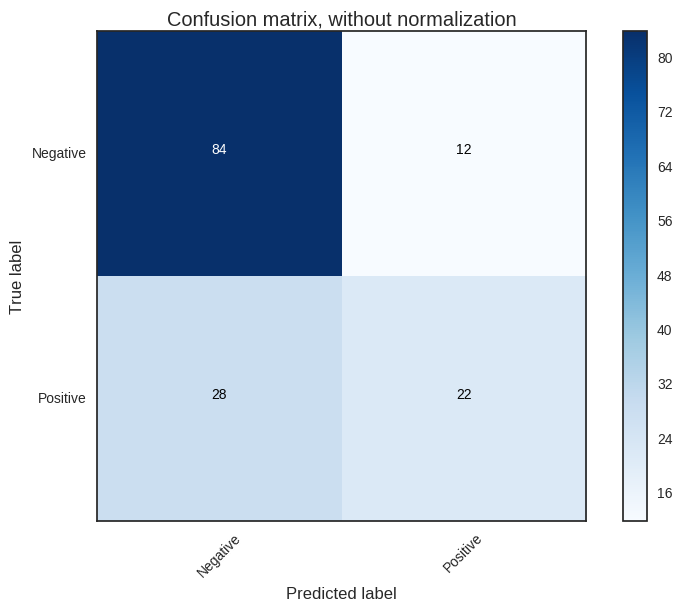

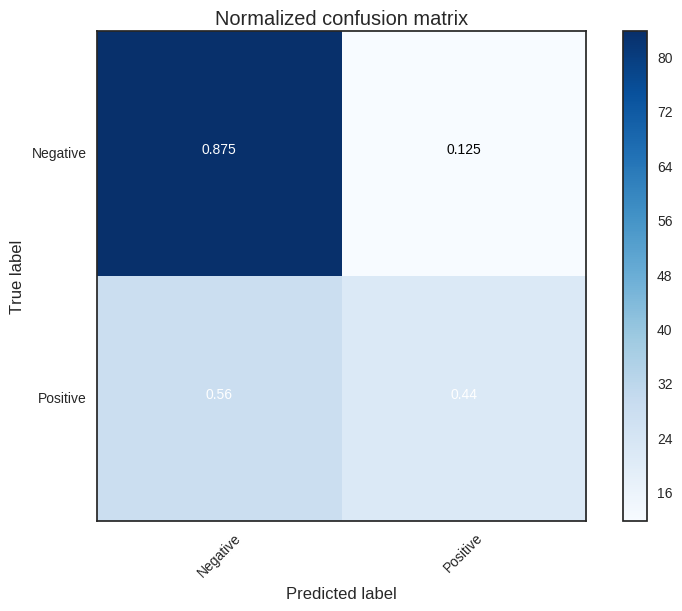

In [107]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = MLPClassifier(hidden_layer_sizes =8,solver='lbfgs')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# class_names = X_train.columns
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Accuracy of best Model**

In [67]:
clf = MLPClassifier(hidden_layer_sizes = 8,solver='lbfgs')
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 71.92%


# K-Nearest Neighbors

In [72]:
clf =  KNeighborsClassifier()
# prepare a range of values to test
md = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
param_grid = [
  {'n_neighbors': md},
]
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [73]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter hidden_layer_sizes: %f" % (grid.best_estimator_.n_neighbors))

Best score: 72.95%
Best estimator for parameter hidden_layer_sizes: 11.000000


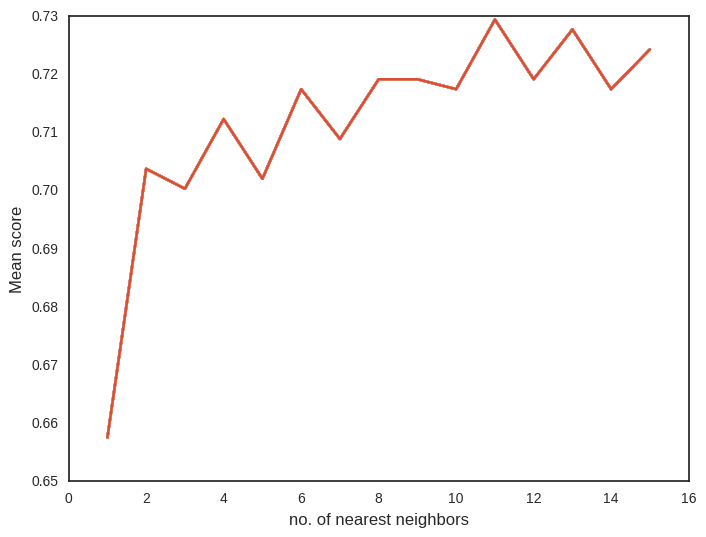

In [75]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores)
md = np.array(md)
for ind, i in enumerate(md):
    plt.plot(md, scores)
plt.legend()
plt.xlabel('no. of nearest neighbors')
plt.ylabel('Mean score')
plt.show()

**Learning Curve for nearest Neighbors**

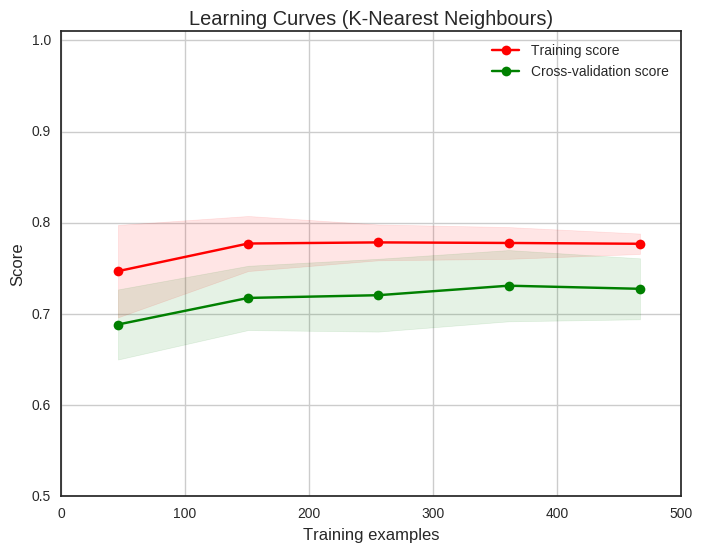

In [76]:
title = "Learning Curves (K-Nearest Neighbours)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors = 11)
plot_learning_curve(estimator, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

**Confusion Matrix using only test data**

Confusion matrix, without normalization
[[83 13]
 [28 22]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.56  0.44]]


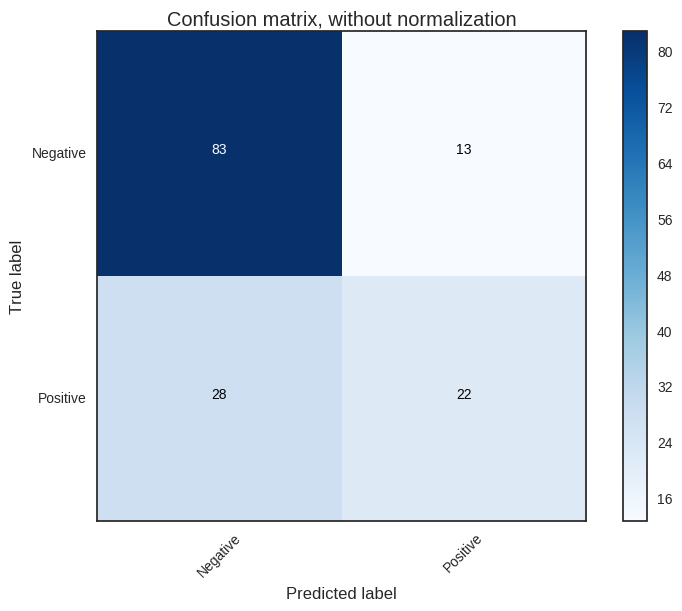

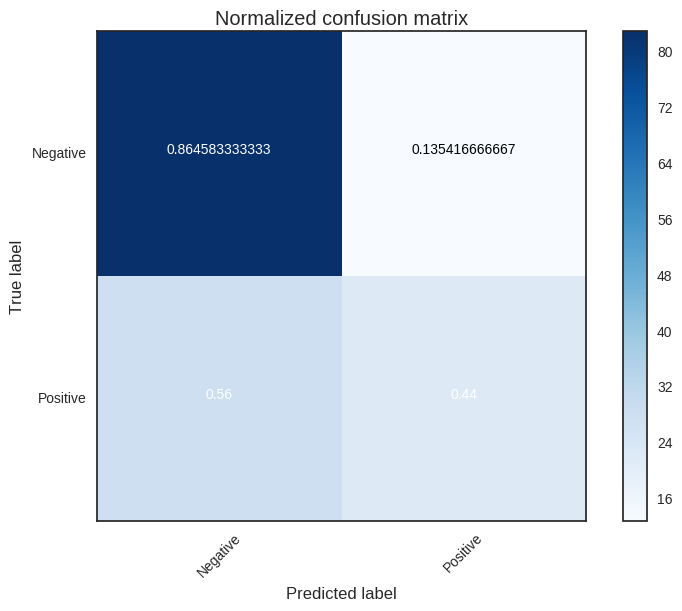

In [77]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = KNeighborsClassifier(n_neighbors = 11)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
dates = pd.date_range('20160101', periods=2)

# class_names = X_train.columns
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [81]:
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 71.92%


# Boosting based on Decision Trees

In [88]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf = AdaBoostClassifier(
    base_estimator = dt,
    n_estimators=100,
    algorithm="SAMME")
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [89]:
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 75.17% (+/- 3.56%)


In [98]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
clf = AdaBoostClassifier(
    base_estimator = dt,
    algorithm="SAMME")
md = [1,5,7,10,20,30,40,50,60,70,80,90,100]
param_grid = [
  {'n_estimators': md},
]
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [99]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter no. of estimators: %f" % (grid.best_estimator_.n_estimators))

Best score: 76.71%
Best estimator for parameter no. of estimators: 7.000000


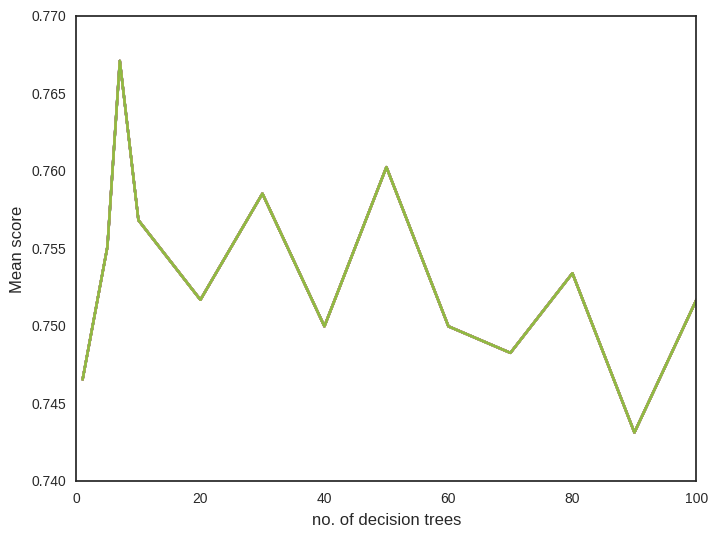

In [100]:
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores)
md = np.array(md)
for ind, i in enumerate(md):
    plt.plot(md, scores)
plt.legend()
plt.xlabel('no. of decision trees')
plt.ylabel('Mean score')
plt.show()

**Learning Curve**

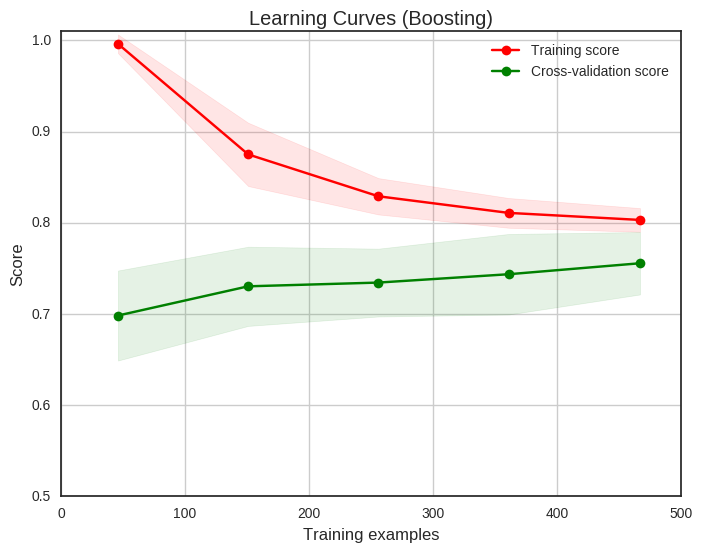

In [102]:
title = "Learning Curves (Boosting)"
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
clf = AdaBoostClassifier(
    base_estimator = dt,
    n_estimators = 7,
    algorithm="SAMME")
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(clf, title, X_train, y_train, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

**Confusion Matrix**

Confusion matrix, without normalization
[[82 14]
 [22 28]]
Normalized confusion matrix
[[ 0.85  0.15]
 [ 0.44  0.56]]


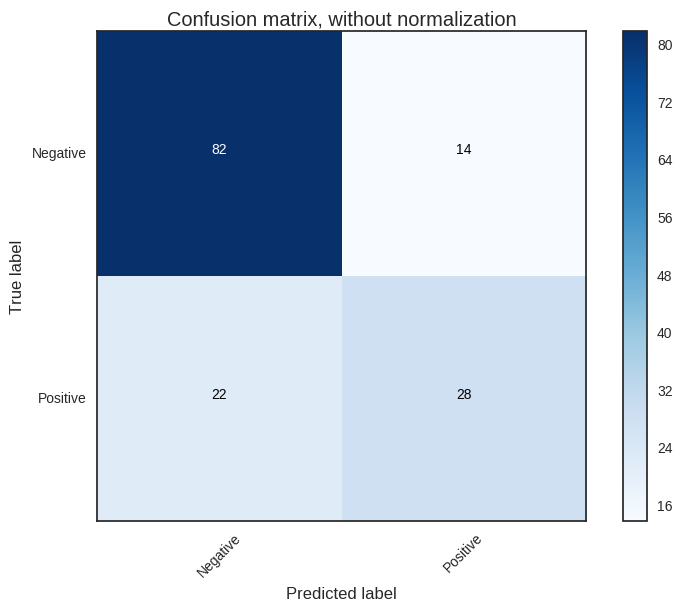

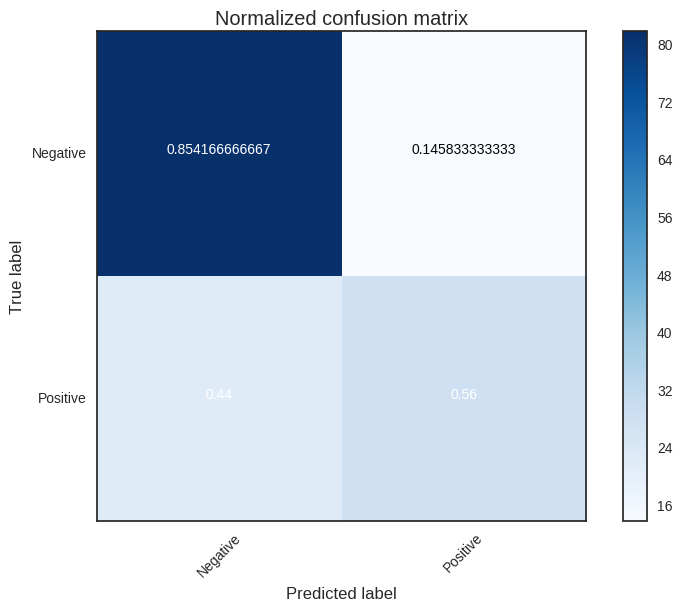

In [103]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
classifier = AdaBoostClassifier(
    base_estimator = dt,
    n_estimators = 7,
    algorithm="SAMME")
y_pred = classifier.fit(X_train, y_train).predict(X_test)
dates = pd.date_range('20160101', periods=2)

# class_names = X_train.columns
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Accuracy of the best Boosting model

In [115]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
classifier = AdaBoostClassifier(
    base_estimator = dt,
    n_estimators = 7,
    algorithm="SAMME")
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 75.34%


# Final Accuracies based on test data for all models for best parameters

In [108]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree-Entropy","Decision Tree-Gini", "Neural Net = lbfgs","Neural Net = ADAM", "AdaBoost"]
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
classifiers = [
    KNeighborsClassifier(n_neighbors = 11),
    SVC(kernel="linear", C=1.0),
    SVC(kernel="rbf", C=0.001),
    DecisionTreeClassifier(criterion = 'entropy', max_depth = 3),
    DecisionTreeClassifier(criterion = 'gini', max_depth = 3),
    MLPClassifier(hidden_layer_sizes =8, solver='lbfgs'),
    AdaBoostClassifier(
    base_estimator = dt,
    n_estimators = 7,
    algorithm="SAMME")
]

In [112]:
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    results[name] = scores

In [113]:
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

  Decision Tree-Gini | Accuracy: 69.89% (+/- 7.61%)
             RBF SVM | Accuracy: 65.75% (+/- 0.92%)
   Neural Net = ADAM | Accuracy: 73.26% (+/- 8.29%)
  Neural Net = lbfgs | Accuracy: 71.22% (+/- 7.21%)
          Linear SVM | Accuracy: 76.00% (+/- 9.96%)
   Nearest Neighbors | Accuracy: 71.86% (+/- 12.23%)
Decision Tree-Entropy | Accuracy: 67.17% (+/- 23.37%)
